### Triton sweepfunctions at t11

In [1]:
from qcodes.dataset import Measurement, initialise_or_create_database_at
from qcodes.dataset.experiment_container import load_or_create_experiment, Experiment
from qcodes.dataset.plotting import plot_by_id
from qcodes.parameters import Parameter
from time import sleep
from qcodes import Station
import qcodes as qc
import numpy as np
from qcodes.dataset.data_set import load_by_id
from qcodes.dataset import (
    ArraySweep,
    LinSweep,
    LogSweep,
    do1d,
    do2d,
    dond,
)

import sys
#sys.path.append('C://Users//Triton11acq//Documents//TritonDriver//TritonDriver//qcodes//instrument_drivers//oxford')
sys.path.append('C://Users//Triton9//Documents//SweepTests//TritonDriver//TritonDriver//qcodes//instrument_drivers//oxford')
from triton import OxfordTriton
# t11 = OxfordTriton("t11", address="10.209.64.175", port=33576)
t11 = OxfordTriton("t11", address="10.209.64.156", port=33576)

from qcodes.instrument_drivers.Lakeshore.Model_372 import Model_372
ls = Model_372('lakeshore_372', 'TCPIP::10.209.66.255::7777::SOCKET') #T11: 'TCPIP::10.209.127.2::7777::SOCKET'

Connected to: OXFORD INSTRUMENTS Triton (serial:N/A, firmware:2.449) in 0.02s
Connected to: LSCI 370 (serial:LSA13YN, firmware:05122015) in 0.11s


In [2]:
# data_path = 'C:\\Users\\Triton11acq\\Documents\\TritonDriver\\Triton'
data_path = 'C:\\Users\\Triton9\\Documents\\SweepTests\\Sweepfunctions\\Triton'
qc.config['core']['db_location'] = data_path
qc.config['user']['mainfolder'] = data_path 
initialise_or_create_database_at(data_path + '\\SweepfunctionsTest.db')
exp = load_or_create_experiment("Sweepfunctions", sample_name="0")

# scfg = Station(config_file='A:\\Networks Experiments\\Code\\station.yaml', use_monitor=True)
scfg = Station(config_file='A:\\Luca\M55A1 JJA Hallbar CD1\\Code\\station.yaml', use_monitor=True)
lockin_2 = scfg.load_instrument('lockin_2')
#keith = scfg.load_instrument('keith')
qdac = scfg.load_instrument('qdac')

c:\Users\Triton9\miniconda3\envs\qcodes\lib\site-packages\qcodes\station.py:429: ValidationWarning: Additional properties are not allowed ('force_close_existing_instrument' was unexpected)

Failed validating 'additionalProperties' in schema['properties']['instruments']['patternProperties']['^\\w+$']:
    {'additionalProperties': False,
     'properties': {'add_parameters': {'additionalProperties': False,
                                       'patternProperties': {'^(\\w+)(\\.\\w+)*$': {'additionalProperties': False,
                                                                                    'properties': {'initial_value': {},
                                                                                                   'inter_delay': {'type': 'number'},
                                                                                                   'label': {'type': 'string'},
                                                                                               

Connected to: Stanford_Research_Systems SR830 (serial:s/n91839, firmware:ver1.07) in 0.16s


Temperature parameter functionalities

In [3]:
from sweepfunction import Temperature, _move_to_setpoint, T1dMeasurement, T2dMeasurement

ch_t_mc = 8
t_mc = Temperature('T_mc', t11, ls, ch_t_mc)

In [3]:
t_mc.prepare_system()

In [3]:
t_mc.heater_range

'10mA'

In [4]:
t_mc.pid

(10.0, 20.0, 0.0)

In [3]:
t_mc(0.2)

#### Parameter check

In [5]:
#temperature
for i in range(1, 17):
    ch = 'T%d' % i
    print(ch + ': ' + str(eval(f"t11.{ch}()")))

T1: 3.4372
T2: 4.07234
T3: 148.057
T4: 0.0870046
T5: 322.471
T6: 43.1037
T7: 55.2004
T8: 0.0152884
T9: 0.0499765
T10: 291.456
T11: 287.167
T12: 0.0
T13: 4.19819
T14: 0.0
T15: 0.0
T16: 0.0


In [6]:
#get thermometer state
for i in range(1, 17):
    ch = 'T%d' % i
    print(ch + ' state: ' + eval(f"t11.{ch}_state()"))

T1 state: on
T2 state: on
T3 state: on
T4 state: on
T5 state: on
T6 state: on
T7 state: on
T8 state: on
T9 state: off
T10 state: off
T11 state: off
T12 state: off
T13 state: on
T14 state: off
T15 state: off
T16 state: off


In [7]:
t11.T13_state('off')
t11.T13_state()

'off'

In [8]:
t11.T13()

4.19819

In [9]:
t11.T13_state('on')
t11.T13_state()

'on'

In [10]:
#set thermometer state
for i in range(1, 17):
    ch = 'T%d' % i
    eval(f"t11.{ch}_state('off')")

for i in range(1, 17):
    ch = 'T%d' % i
    print(ch + ' state: ' + eval(f"t11.{ch}_state()"))

T1 state: off
T2 state: off
T3 state: off
T4 state: off
T5 state: off
T6 state: off
T7 state: off
T8 state: off
T9 state: off
T10 state: off
T11 state: off
T12 state: off
T13 state: off
T14 state: off
T15 state: off
T16 state: off


In [11]:
#set thermometer state
for i in range(1, 17):
    ch = 'T%d' % i
    eval(f"t11.{ch}_state('on')")

In [22]:
#get pump speed
t11.turb1_speed()

820.0

In [29]:
#get pump state
for pump in ['TURB1', 'COMP']:
    print(eval(f't11.{pump.lower()}_state()'))

on
on


In [33]:
# get heater range
t11.pid_range()

0.316

In [35]:
# set heater range
t11.pid_range(0.316)

In [36]:
# temperature control
t11.pid_p(), t11.pid_i(), t11.pid_d()

(10.0, 20.0, 0.0)

In [37]:
# temperature control
t11.pid_p(11.), t11.pid_i(21.), t11.pid_d(0.1)
t11.pid_p(), t11.pid_i(), t11.pid_d()

(11.0, 21.0, 0.1)

In [38]:
t11.pid_p(10.), t11.pid_i(20.), t11.pid_d(0.)
t11.pid_p(), t11.pid_i(), t11.pid_d()

(10.0, 20.0, 0.0)

In [39]:
# temperature control
t11.pid_setpoint()

0.0

In [40]:
# temperature control
t11.pid_setpoint(t11.pid_setpoint())

#### T-sweep functions test

In [3]:
from sweepfunction import Temperature, live_configurator, _toggle_turbo, _get_best_heater_range, _set_heater_range, _move_to_setpoint, magnet_check, _set_pid_controller, _set_active_channels, _init_sweep_state, _stable

In [4]:
# Temperature channel
ch_t_mc = 8
t_mc = Temperature('T_mc', ls, ch_t_mc)

In [5]:
t_mc()

0.674679

In [6]:
# Basic functionality
_close(t_mc(), setpoint=0.1, tolerance=0.0001), _close(t_mc(), setpoint=t_mc() + 0.01, tolerance=0.1)

(False, True)

In [7]:
# Basic functionality
ch_t_magnet = 13
magnet_check(ls, ch_t_magnet)

4.2125

In [8]:
# Heater control
for temp in t11._heater_range_temp:
    t = temp - 0.001
    print(f"T = {t}")
    print('Heater range: ', _get_best_heater_range(t11._heater_range_temp, t11._heater_range_curr, t))

T = 0.028999999999999998
Heater range:  1
T = 0.099
Heater range:  3.16
T = 0.299
Heater range:  10
T = 0.999
Heater range:  31.6
T = 11.999
Heater range:  None
T = 39.999
Heater range:  None


In [10]:
# Heater control
print(ls.sample_heater.output_range())
_set_heater_range(ls, t_mc, 31.6, ls.sample_heater.output_range())

off


31.6

In [12]:
# PID
_set_pid_controller(ls, pid_values=(10.1, 21., 1.))
ls.sample_heater.P(), ls.sample_heater.I(), ls.sample_heater.D()

(10.1, 21.0, 1.0)

In [14]:
# PID
_set_pid_controller(ls, pid_values=(10., 20., 0.))
ls.sample_heater.P(), ls.sample_heater.I(), ls.sample_heater.D()

(10.0, 20.0, 0.0)

In [11]:
ls.sample_heater.P(), ls.sample_heater.I(), ls.sample_heater.D()

(20.0, 10.0, 0.0)

In [9]:
ls.ch01.enabled(False)

In [7]:
# Temperature channels
ch_t_mc = 8
ch_t_magnet = 13
_set_active_channels(ls, ch_t_mc, ch_t_magnet)

True


In [12]:
ls.ch13.enabled(False)

In [10]:
for ch in ls.channels:
    print(f'Temperature of {ch.short_name} ({"on" if ch.enabled() else "off"}): {ch.temperature()} {ch.units()}')

Temperature of ch01 (on): 3.48143 kelvin
Temperature of ch02 (off): 4.09173 ohms
Temperature of ch03 (off): 0.0 ohms
Temperature of ch04 (off): 0.102243 ohms
Temperature of ch05 (off): 0.0 kelvin
Temperature of ch06 (off): 0.0 kelvin
Temperature of ch07 (off): 0.0 kelvin
Temperature of ch08 (on): 0.308899 kelvin
Temperature of ch09 (off): 0.0 ohms
Temperature of ch10 (off): 0.0 ohms
Temperature of ch11 (off): 0.0 ohms
Temperature of ch12 (off): 0.0 ohms
Temperature of ch13 (off): 4.22909 ohms
Temperature of ch14 (off): 0.0 ohms
Temperature of ch15 (off): 0.0 ohms
Temperature of ch16 (off): 0.0 ohms


In [5]:
ls.ch01.enabled(True), ls.ch02.enabled(True), ls.ch03.enabled(True), ls.ch04.enabled(True), ls.ch06.enabled(True)

(None, None, None, None, None)

In [24]:
# Turbo control
meas = Measurement()
meas.write_period = 5.
time_step = Parameter('time_step', label='Time Step')
meas.register_parameter(time_step)
meas.register_parameter(t_mc, setpoints=(time_step, ))
meas.register_parameter(t11.turb1_speed, setpoints=(time_step, ))

best_state = 'off'
turbo_state = t11.turb1_state()
future_setpoint = t_mc() + 0.01
critical_speed = 100

with meas.run() as datasaver:

    datasaver.add_result(
        (time_step, 0),
        (t_mc, t_mc()),
        (t11.turb1_speed, t11.turb1_speed())
    )

    t11.pid_setpoint(future_setpoint)
    #_toggle_turbo(t11, best_state, turbo_state, future_setpoint, t_mc, critical_speed)

    current_time = 1
    while not _close(t_mc(), future_setpoint):
        
        datasaver.add_result(
            (time_step, current_time),
            (t_mc, t_mc()),
            (t11.turb1_speed, t11.turb1_speed())
        )
        sleep(1)
        current_time += 1

Starting experimental run with id: 1. 


([<AxesSubplot: title={'center': 'Run #1, Experiment Sweepfunctions (0)'}, xlabel='Time Step', ylabel='T_mc (mK)'>,
  <AxesSubplot: title={'center': 'Run #1, Experiment Sweepfunctions (0)'}, xlabel='Time Step', ylabel='Turbo 1 speed (Hz)'>],
 [None, None])

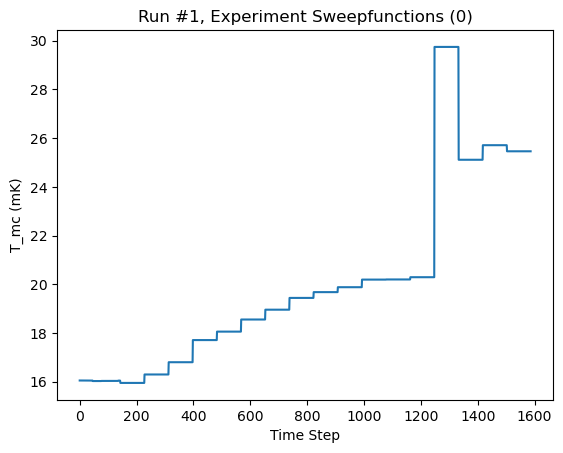

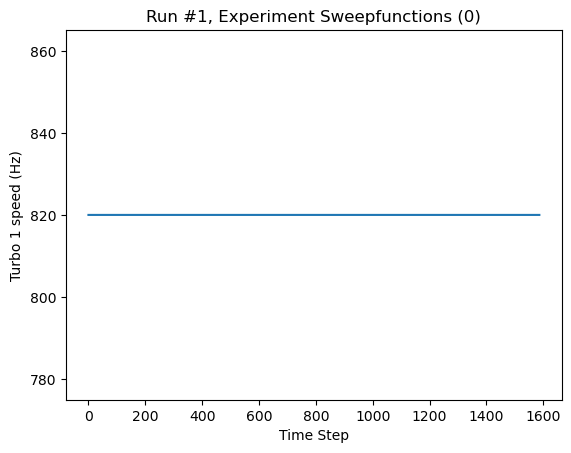

In [27]:
plot_by_id(1)

In [7]:
t11.pid_setpoint(0.55)

In [13]:
t_mc()

0.553611

In [14]:
# Turbo control
meas = Measurement()
meas.write_period = 5.
time_step = Parameter('time_step', label='Time Step')
meas.register_parameter(time_step)
meas.register_parameter(t_mc, setpoints=(time_step, ))
meas.register_parameter(t11.turb1_speed, setpoints=(time_step, ))

best_state = 'off'
turbo_state = t11.turb1_state()
future_setpoint = t_mc() + 0.1
critical_speed = 100

with meas.run() as datasaver:

    datasaver.add_result(
        (time_step, 0),
        (t_mc, t_mc()),
        (t11.turb1_speed, t11.turb1_speed())
    )

    t11.pid_setpoint(future_setpoint)
    _toggle_turbo(t11, best_state, turbo_state, future_setpoint, t_mc, critical_speed)

    current_time = 1
    while not _close(t_mc(), future_setpoint, tolerance=0.0005):
        
        datasaver.add_result(
            (time_step, current_time),
            (t_mc, t_mc()),
            (t11.turb1_speed, t11.turb1_speed())
        )
        sleep(1)
        current_time += 1

Starting experimental run with id: 2. 


2023-07-31 12:02:56,251 - Temperature Sweep                               - INFO - Turbo 1 has been switched offat T = 0.550975 K


([<AxesSubplot: title={'center': 'Run #2, Experiment Sweepfunctions (0)'}, xlabel='Time Step', ylabel='T_mc (mK)'>,
  <AxesSubplot: title={'center': 'Run #2, Experiment Sweepfunctions (0)'}, xlabel='Time Step', ylabel='Turbo 1 speed (Hz)'>],
 [None, None])

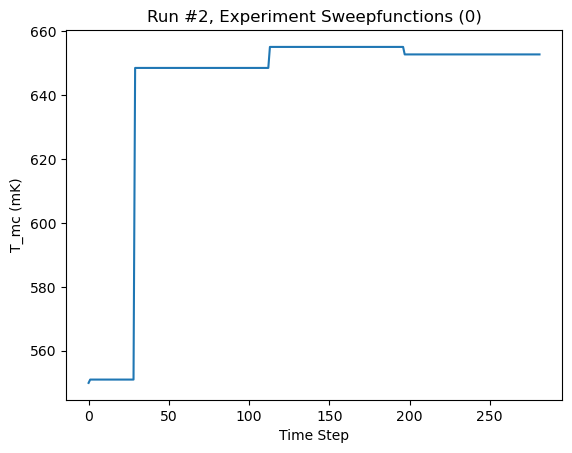

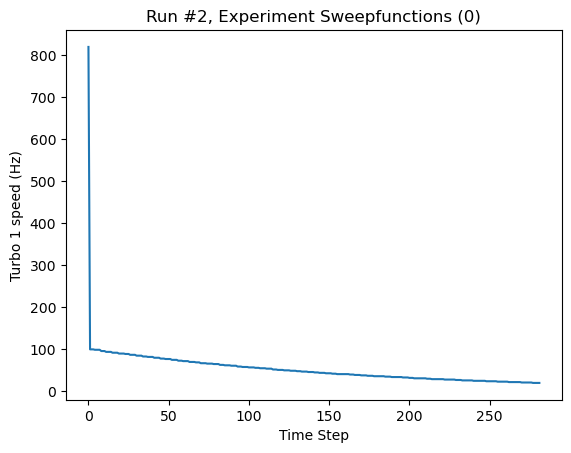

In [15]:
plot_by_id(2)

In [5]:
# Turbo control
meas = Measurement()
meas.write_period = 5.
time_step = Parameter('time_step', label='Time Step')
meas.register_parameter(time_step)
meas.register_parameter(t_mc, setpoints=(time_step, ))
meas.register_parameter(t11.turb1_speed, setpoints=(time_step, ))

best_state = 'on'
turbo_state = t11.turb1_state()
future_setpoint = t_mc() - 0.1
critical_speed = 100

with meas.run() as datasaver:

    datasaver.add_result(
        (time_step, 0),
        (t_mc, t_mc()),
        (t11.turb1_speed, t11.turb1_speed())
    )

    t11.pid_setpoint(future_setpoint)
    _toggle_turbo(t11, best_state, turbo_state, future_setpoint, t_mc, critical_speed)

    current_time = 1
    while not _close(t_mc(), future_setpoint):
        
        datasaver.add_result(
            (time_step, current_time),
            (t_mc, t_mc()),
            (t11.turb1_speed, t11.turb1_speed())
        )
        sleep(1)
        current_time += 1

Starting experimental run with id: 4. 


2023-07-31 12:12:32,106 - Temperature Sweep                               - INFO - Turbo 1 has been switched on at T = 0.616936 K


([<AxesSubplot: title={'center': 'Run #4, Experiment Sweepfunctions (0)'}, xlabel='Time Step', ylabel='T_mc (mK)'>,
  <AxesSubplot: title={'center': 'Run #4, Experiment Sweepfunctions (0)'}, xlabel='Time Step', ylabel='Turbo 1 speed (Hz)'>],
 [None, None])

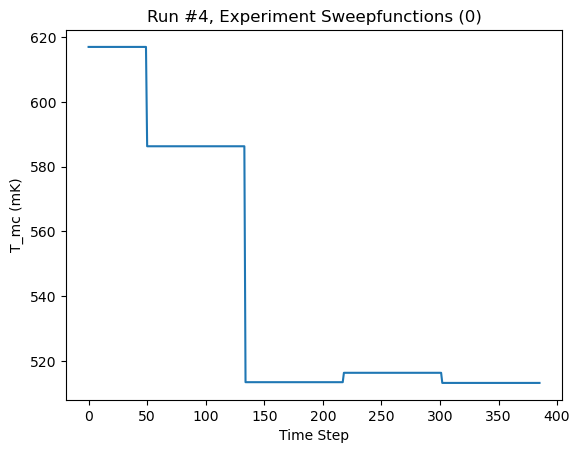

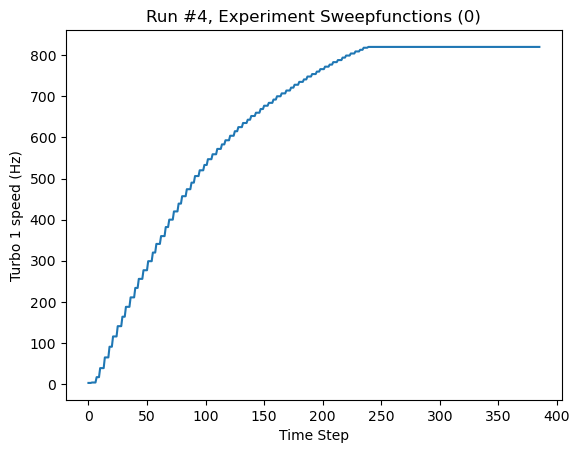

In [6]:
plot_by_id(4)

In [7]:
# cryostat control
t11.pid_setpoint(0.29)

In [12]:
_get_best_heater_range(t11._heater_range_temp, t11._heater_range_curr, 0.31)

31.6

In [9]:
# cryostat control
print(t11.turb1_state(), t11.pid_range())
future_setpoint = 0.31
t11.pid_setpoint(future_setpoint)
live_configurator(t11, t_mc, future_setpoint, t11.pid_range(), t11.turb1_state())
print(t11.turb1_state(), t11.pid_range())

on 10.0
on 31.6


In [10]:
# cryostat control
t11.pid_setpoint(0.75)

In [5]:
# cryostat control
print(t11.turb1_state(), t11.pid_range())
future_setpoint = 0.79
t11.pid_setpoint(future_setpoint)
live_configurator(t11, t_mc, future_setpoint, t11.pid_range(), t11.turb1_state())
print(t11.turb1_state(), t11.pid_range())

on 31.6


2023-07-31 13:34:31,870 - Temperature Sweep                               - INFO - Turbo 1 has been switched off at T = 0.791326 K


off 31.6


In [6]:
# Temperature control
future_setpoint = 0.09
_set_temp_setpoint(
    t11, 
    t_mc, 
    future_setpoint, 
    magnet_active=True, 
    t_magnet_ch=13, 
    turbo_state=t11.turb1_state(), 
    heater_range=t11.pid_range(),
)

2023-07-31 13:44:41,615 - Temperature Sweep                               - INFO - Turbo 1 has been switched on at T = 0.700358 K
2023-07-31 13:51:56,215 - Temperature Sweep                               - INFO - Heater range changed to 10 mA at T = 0.232905 K.
2023-07-31 13:56:17,021 - Temperature Sweep                               - INFO - Heater range changed to 3.16 mA at T = 0.0895501 K.


('on', 3.16)

In [8]:
for ch in ls.channels:
    print(f'Temperature of {ch.short_name} ({"on" if ch.enabled() else "off"}): {ch.temperature()} {ch.units()}')

Temperature of ch01 (off): 3.45776 kelvin
Temperature of ch02 (off): 4.09173 ohms
Temperature of ch03 (off): 0.0 ohms
Temperature of ch04 (off): 0.102243 ohms
Temperature of ch05 (off): 0.0 kelvin
Temperature of ch06 (off): 0.0 kelvin
Temperature of ch07 (off): 0.0 kelvin
Temperature of ch08 (on): 0.122544 kelvin
Temperature of ch09 (off): 0.0 ohms
Temperature of ch10 (off): 0.0 ohms
Temperature of ch11 (off): 0.0 ohms
Temperature of ch12 (off): 0.0 ohms
Temperature of ch13 (off): 4.22909 ohms
Temperature of ch14 (off): 0.0 ohms
Temperature of ch15 (off): 0.0 ohms
Temperature of ch16 (off): 0.0 ohms


In [7]:
# cryostate control
_init_sweep_state(t11, ls, ch_t_mc, 13, False, pid=(10., 20., 0.), wait_cycle_time=0.5, wait_tolerance=0.1, wait_equilibration_time=1.5)

('on', 'off')

In [5]:
# Temperature control
future_setpoint = 0.8
_set_temp_setpoint(
    t11,
    ls,
    t_mc, 
    future_setpoint, 
    magnet_active=False, 
    t_magnet_ch=13, 
    turbo_state=t11.turb1_state(), 
    heater_range=ls.sample_heater.output_range(),
)

2023-07-31 16:41:56,371 - Temperature Sweep                               - INFO - Heater range changed to 3.16 mA at T = 0.083013 K.
2023-07-31 16:41:59,611 - Temperature Sweep                               - INFO - Heater range changed to 10 mA at T = 0.101923 K.
2023-07-31 16:42:16,235 - Temperature Sweep                               - INFO - Heater range changed to 31.6 mA at T = 0.30704 K.
2023-07-31 16:42:22,135 - Temperature Sweep                               - INFO - Turbo 1 has been switched off at T = 0.784587 K


('off', 31.6)

In [5]:
# Temperature control
future_setpoint = 0.5
_set_temp_setpoint(
    t11,
    ls,
    t_mc, 
    future_setpoint, 
    magnet_active=False, 
    t_magnet_ch=13, 
    turbo_state=t11.turb1_state(), 
    heater_range=ls.sample_heater.output_range(),
)

2023-07-31 16:53:25,054 - Temperature Sweep                               - INFO - Heater range changed to 31.6 mA at T = 0.795479 K.
2023-07-31 16:53:28,695 - Temperature Sweep                               - INFO - Turbo 1 has been switched on at T = 0.777872 K


('on', 31.6)

In [5]:
# Temperature control
future_setpoint = 0.2
temperature_tolerance = 5e-4
_move_to_setpoint(
    t11,
    ls,
    t_mc, 
    future_setpoint, 
    magnet_active=False, 
    t_magnet_ch=13, 
    turbo_state=t11.turb1_state(), 
    heater_range=ls.sample_heater.output_range(),
    temperature_tolerance=temperature_tolerance
)

KeyboardInterrupt: 

In [7]:
ls.sample_heater.setpoint(0)

#### Temperature sweeps

In [5]:
from sweepfunction import T1dMeasurement, T2dMeasurement

In [5]:
param_meas = [lockin_2.B1_XX_X, lockin_2.B1_XX_P]

In [6]:
for param in param_meas:
    print(param())

2.59401e-07
84.642


In [12]:
(1.1-0.25)/41

0.020731707317073172

In [7]:
# test sweeping up through turbo and heater transition
T1dMeasurement(
    t11,
    ls,
    0.25,
    0.4,
    21,
    1,
    *param_meas,
    pid_values=(10., 20., 0.),
    t_mc_ch=8,
    t_magnet_ch=13,
    magnet_active=False,
    write_period=5,
)

2023-07-31 17:31:10,548 - Temperature Sweep                               - INFO - Heater range changed to 10 mA at T = 0.250017 K.


Starting experimental run with id: 9. 


2023-07-31 17:31:10,788 - Temperature Sweep                               - INFO - Heater range changed to 10 mA at T = 0.250017 K.
2023-07-31 17:33:29,677 - Temperature Sweep                               - INFO - Heater range changed to 31.6 mA at T = 0.300599 K.


results #9@C:\Users\Triton11acq\Documents\TritonDriver\Triton\SweepfunctionsTest.db
-----------------------------------------------------------------------------------
mc_temperature - numeric
lockin_2_A2_XX1_X - numeric
lockin_2_A2_XX1_P - numeric

([<AxesSubplot: title={'center': 'Run #9, Experiment Sweepfunctions (0)'}, xlabel='MC Temperature (mK)', ylabel='U_XX (BNC38-82) (μV)'>,
  <AxesSubplot: title={'center': 'Run #9, Experiment Sweepfunctions (0)'}, xlabel='MC Temperature (mK)', ylabel='U_XX_P (BNC38-82) (deg)'>],
 [None, None])

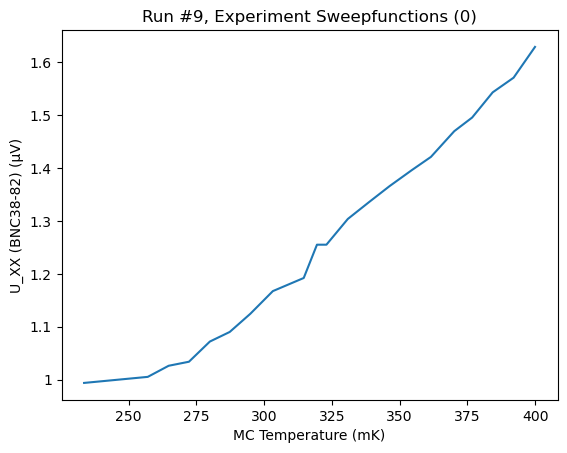

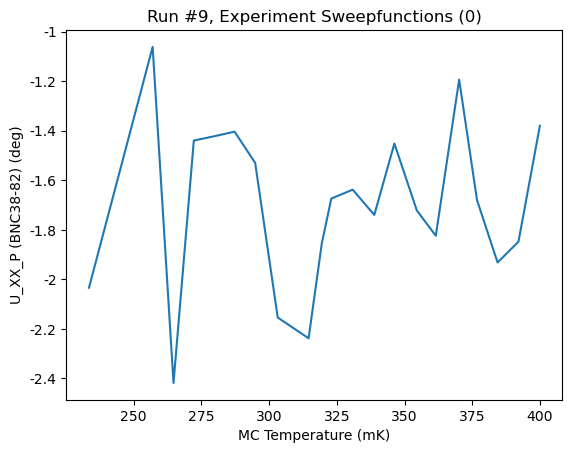

In [8]:
plot_by_id(9)

In [9]:
# test sweeping down through turbo and heater transition
T1dMeasurement(
    t11,
    ls,
    0.85,
    0.6,
    21,
    1,
    *param_meas,
    pid_values=(10., 20., 0.),
    t_mc_ch=8,
    t_magnet_ch=13,
    magnet_active=False,
    write_period=5,
)

2023-07-31 17:37:56,042 - Temperature Sweep                               - INFO - Heater range changed to 31.6 mA at T = 0.4001 K.


Starting experimental run with id: 10. 


2023-07-31 17:37:56,293 - Temperature Sweep                               - INFO - Heater range changed to 31.6 mA at T = 0.4001 K.
2023-07-31 17:38:04,884 - Temperature Sweep                               - INFO - Turbo 1 has been switched off at T = 0.783499 K
2023-07-31 17:50:22,749 - Temperature Sweep                               - INFO - Turbo 1 has been switched on at T = 0.779283 K


results #10@C:\Users\Triton11acq\Documents\TritonDriver\Triton\SweepfunctionsTest.db
------------------------------------------------------------------------------------
mc_temperature - numeric
lockin_2_A2_XX1_X - numeric
lockin_2_A2_XX1_P - numeric

([<AxesSubplot: title={'center': 'Run #10, Experiment Sweepfunctions (0)'}, xlabel='MC Temperature (mK)', ylabel='U_XX (BNC38-82) (μV)'>,
  <AxesSubplot: title={'center': 'Run #10, Experiment Sweepfunctions (0)'}, xlabel='MC Temperature (mK)', ylabel='U_XX_P (BNC38-82) (deg)'>],
 [None, None])

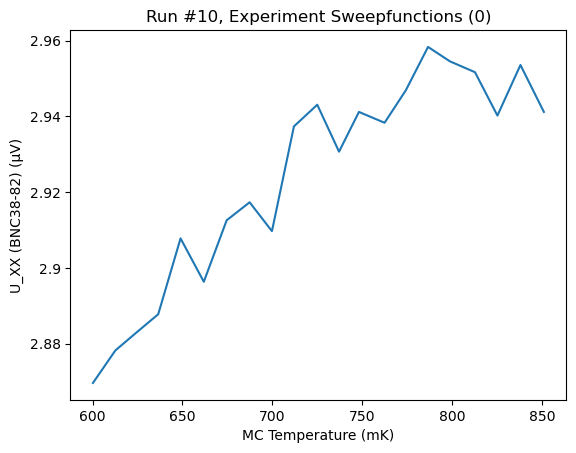

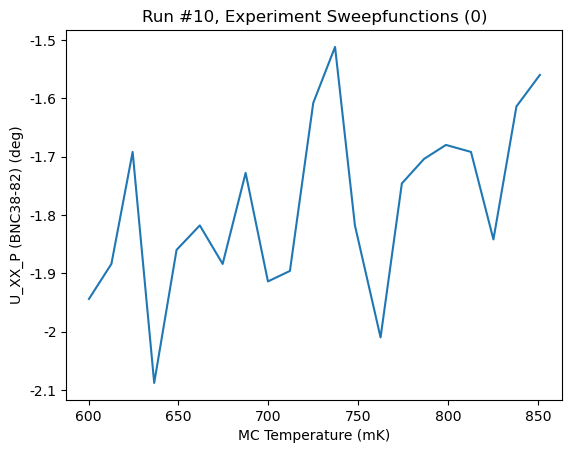

In [10]:
plot_by_id(10)

Make the change to temperature setpoints instead of measured temperature points

In [7]:
# test sweeping up through turbo and heater transition
T1dMeasurement(
    t11,
    ls,
    0.2,
    0.4,
    21,
    1,
    *param_meas
)

Starting experimental run with id: 1. 


results #1@C:\Users\Triton9\Documents\SweepTests\Sweepfunctions\Triton\SweepfunctionsTest.db
--------------------------------------------------------------------------------------------
temperature_setpoints - numeric
mc_temperature - numeric
temperature_deviation - numeric
lockin_2_B1_XX_X - numeric
lockin_2_B1_XX_P - numeric

([<AxesSubplot: title={'center': 'Run #1, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints (mK)', ylabel='MC Temperature (mK)'>,
  <AxesSubplot: title={'center': 'Run #1, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints (mK)', ylabel='Temperature Deviation (mK)'>,
  <AxesSubplot: title={'center': 'Run #1, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints (mK)', ylabel='U_XX (BNC3-31) (nV)'>,
  <AxesSubplot: title={'center': 'Run #1, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints (mK)', ylabel='U_XX_P (BNC3-31) (deg)'>],
 [None, None, None, None])

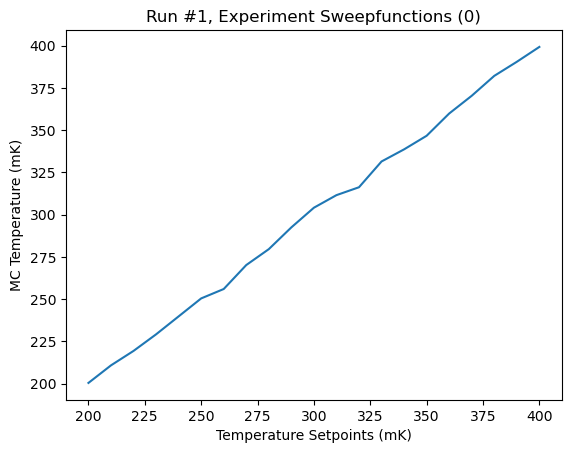

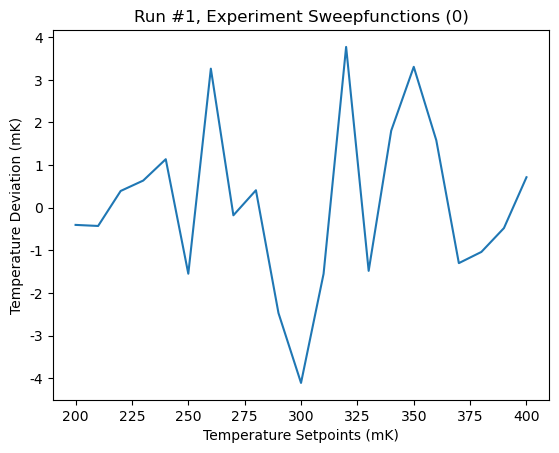

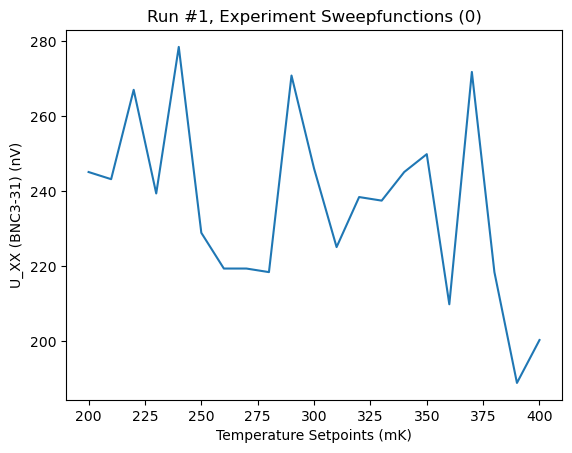

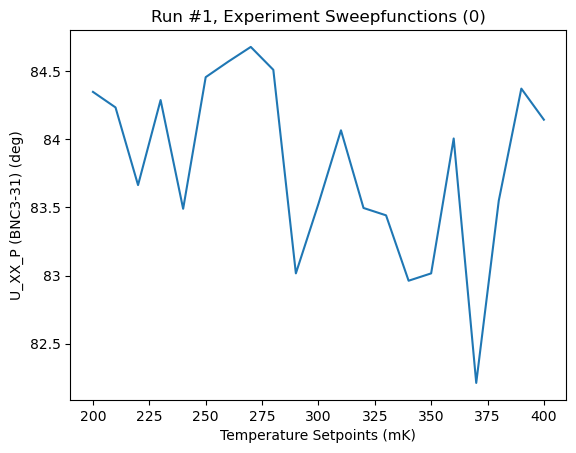

In [8]:
plot_by_id(1)

In [5]:
# test sweeping up through turbo and heater transition
T1dMeasurement(
    t11,
    ls,
    0.4,
    0.2,
    21,
    1,
    *param_meas,
    temperature_tolerance=3e-3
)

Starting experimental run with id: 5. 


results #5@C:\Users\Triton9\Documents\SweepTests\Sweepfunctions\Triton\SweepfunctionsTest.db
--------------------------------------------------------------------------------------------
temperature_setpoints - numeric
mc_temperature - numeric
temperature_deviation - numeric
lockin_2_B1_XX_X - numeric
lockin_2_B1_XX_P - numeric

([<AxesSubplot: title={'center': 'Run #5, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints (mK)', ylabel='MC Temperature (mK)'>,
  <AxesSubplot: title={'center': 'Run #5, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints (mK)', ylabel='Temperature Deviation (mK)'>,
  <AxesSubplot: title={'center': 'Run #5, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints (mK)', ylabel='U_XX (BNC3-31) (nV)'>,
  <AxesSubplot: title={'center': 'Run #5, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints (mK)', ylabel='U_XX_P (BNC3-31) (deg)'>],
 [None, None, None, None])

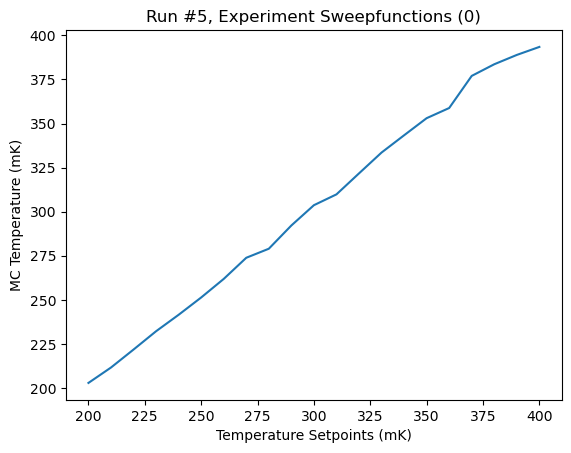

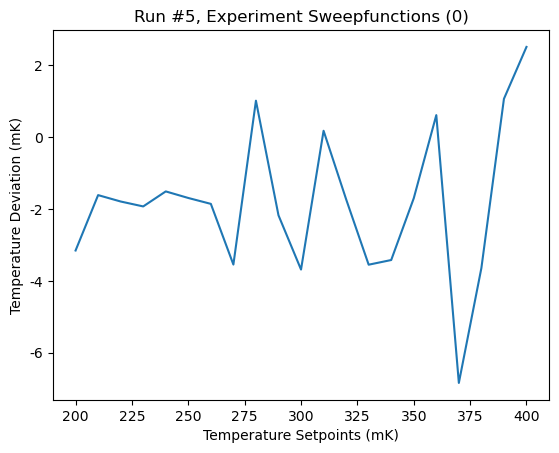

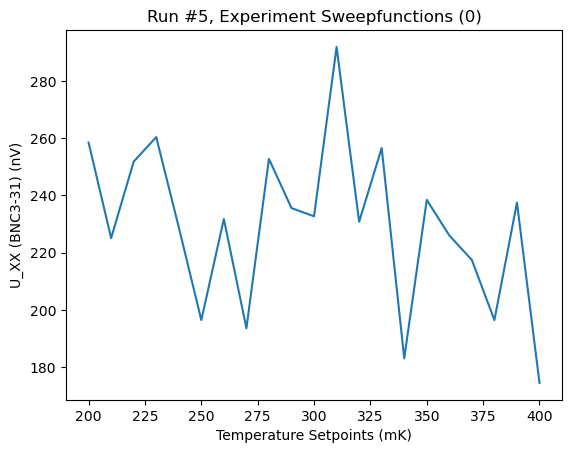

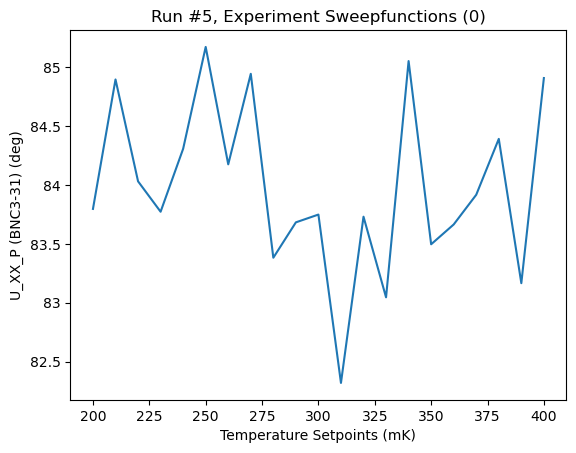

In [7]:
plot_by_id(5)

2D maps

In [ ]:
qdac.A2_TG(0)

0.0

In [5]:
# test sweeping up through turbo and heater transition; 2D scan
T2dMeasurement(
    t11,
    ls,
    0.6,
    0.25,
    21,
    1,
    qdac.A2_TG,
    0,
    -0.1,
    41,
    0.1,
    *param_meas,
    pid_values=(10., 20., 0.),
    t_mc_ch=8,
    t_magnet_ch=13,
    magnet_active=False,
    write_period=5,
)

2023-07-31 18:26:38,644 - Temperature Sweep                               - INFO - Heater range changed to 31.6 mA at T = 0.59995 K.


Starting experimental run with id: 13. 


2023-07-31 18:26:38,883 - Temperature Sweep                               - INFO - Heater range changed to 31.6 mA at T = 0.59995 K.
2023-07-31 18:36:19,035 - Temperature Sweep                               - INFO - Heater range changed to 10 mA at T = 0.296838 K.


results #13@C:\Users\Triton11acq\Documents\TritonDriver\Triton\SweepfunctionsTest.db
------------------------------------------------------------------------------------
temperature_setpoints - numeric
qdac_A2_TG - numeric
mc_temperature - numeric
lockin_2_A2_XX1_X - numeric
lockin_2_A2_XX1_P - numeric

([<AxesSubplot: title={'center': 'Run #13, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints', ylabel='A2_TG (BNC60) (mV)'>,
  <AxesSubplot: title={'center': 'Run #13, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints', ylabel='A2_TG (BNC60) (mV)'>,
  <AxesSubplot: title={'center': 'Run #13, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints', ylabel='A2_TG (BNC60) (mV)'>],
  <matplotlib.colorbar.Colorbar at 0x26dde2372b0>])

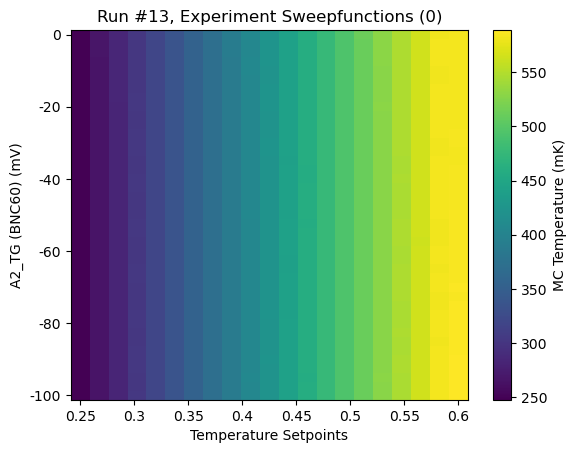

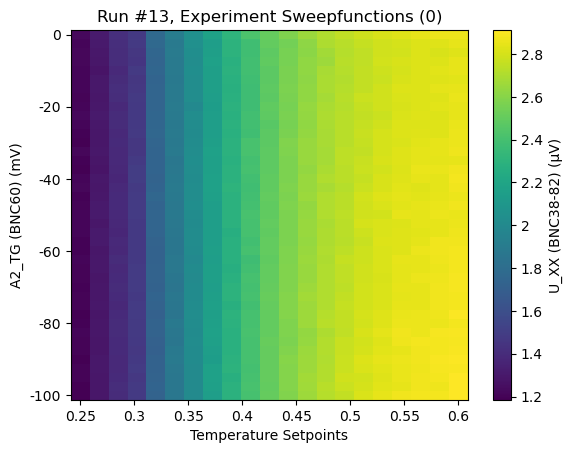

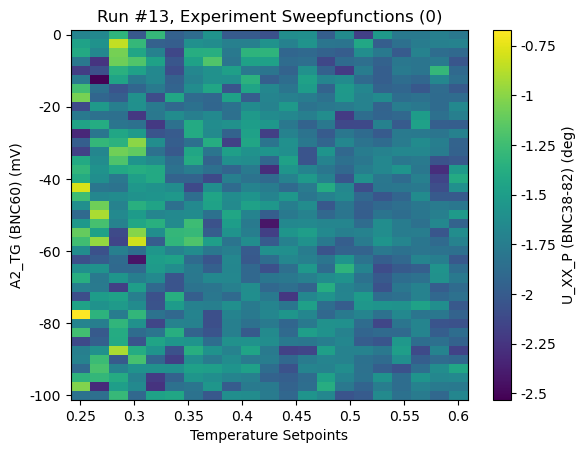

In [6]:
plot_by_id(13)

In [13]:
future_setpoint = 0.6
temperature_tolerance = 5e-4
_move_to_setpoint(
    t11,
    ls,
    t_mc, 
    future_setpoint, 
    magnet_active=False, 
    t_magnet_ch=13, 
    turbo_state=t11.turb1_state(), 
    heater_range=ls.sample_heater.output_range(),
    temperature_tolerance=temperature_tolerance
)

2023-07-31 18:51:32,166 - Temperature Sweep                               - INFO - Heater range changed to 31.6 mA at T = 0.780109 K.


('on', 31.6)

In [7]:
# test sweeping down through turbo and heater transition; 2D scan
T2dMeasurement(
    t11,
    ls,
    0.6,
    0.9,
    21,
    1,
    qdac.A2_TG,
    0,
    -0.1,
    41,
    0.1,
    *param_meas,
    pid_values=(10., 20., 0.),
    t_mc_ch=8,
    t_magnet_ch=13,
    magnet_active=False,
    write_period=5,
)

Starting experimental run with id: 15. 


2023-07-31 19:00:47,802 - Temperature Sweep                               - INFO - Turbo 1 has been switched off at T = 0.780658 K


results #15@C:\Users\Triton11acq\Documents\TritonDriver\Triton\SweepfunctionsTest.db
------------------------------------------------------------------------------------
temperature_setpoints - numeric
qdac_A2_TG - numeric
mc_temperature - numeric
lockin_2_A2_XX1_X - numeric
lockin_2_A2_XX1_P - numeric

([<AxesSubplot: title={'center': 'Run #15, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints', ylabel='A2_TG (BNC60) (mV)'>,
  <AxesSubplot: title={'center': 'Run #15, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints', ylabel='A2_TG (BNC60) (mV)'>,
  <AxesSubplot: title={'center': 'Run #15, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints', ylabel='A2_TG (BNC60) (mV)'>],
  <matplotlib.colorbar.Colorbar at 0x17336a885b0>])

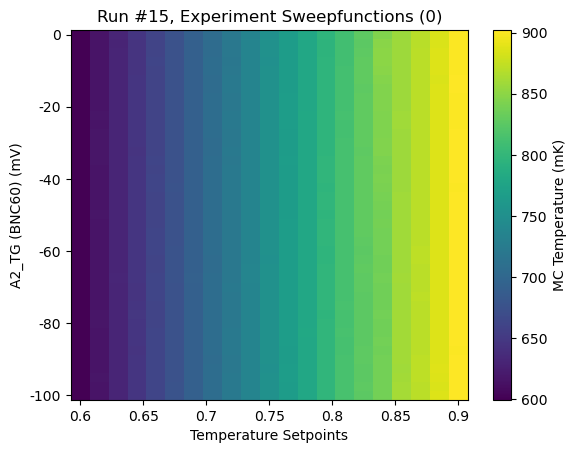

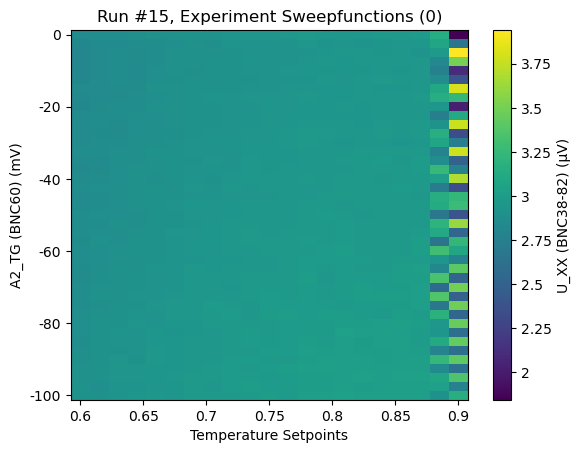

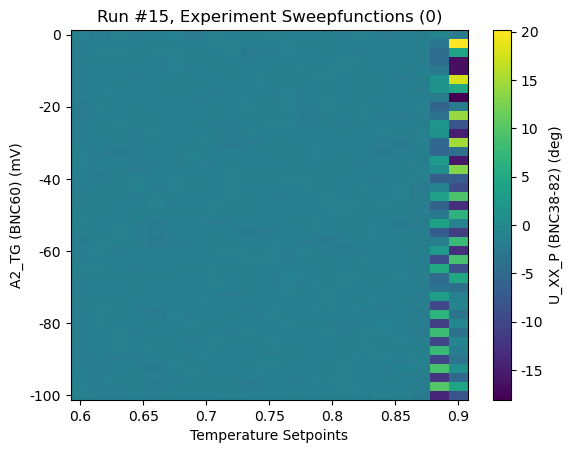

In [8]:
plot_by_id(15)

Added difference between setpoint and measured T-values

In [5]:
future_setpoint = 0.7
t_mc(future_setpoint)

KeyboardInterrupt: 

In [16]:
ls.sample_heater.P(5)

In [13]:
ls.sample_heater.P()

4.0

In [11]:
ls.sample_heater.D()

0.0

In [17]:
T2dMeasurement(
    t11,
    ls,
    0.7,
    0.9,
    21,
    1,
    qdac.C3_TG,
    0,
    -0.1,
    41,
    0.1,
    *param_meas,
    temperature_tolerance=3e-3,
)

Starting experimental run with id: 7. 


2023-08-07 15:34:29,441 - Temperature Sweep                               - INFO - Turbo 1 has been switched off at T = 0.774965 K


results #7@C:\Users\Triton9\Documents\SweepTests\Sweepfunctions\Triton\SweepfunctionsTest.db
--------------------------------------------------------------------------------------------
temperature_setpoints - numeric
qdac_C3_TG - numeric
mc_temperature - numeric
temperature_deviation - numeric
lockin_2_B1_XX_X - numeric
lockin_2_B1_XX_P - numeric

([<AxesSubplot: title={'center': 'Run #7, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints (mK)', ylabel='C3_TG (BNC57) (mV)'>,
  <AxesSubplot: title={'center': 'Run #7, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints (mK)', ylabel='C3_TG (BNC57) (mV)'>,
  <AxesSubplot: title={'center': 'Run #7, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints (mK)', ylabel='C3_TG (BNC57) (mV)'>,
  <AxesSubplot: title={'center': 'Run #7, Experiment Sweepfunctions (0)'}, xlabel='Temperature Setpoints (mK)', ylabel='C3_TG (BNC57) (mV)'>],
  <matplotlib.colorbar.Colorbar at 0x2125b0ac820>])

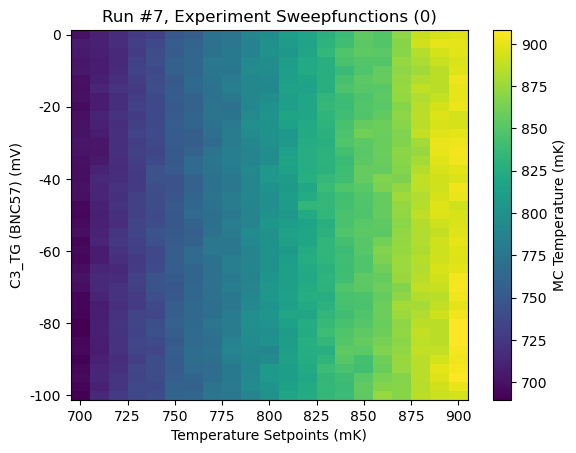

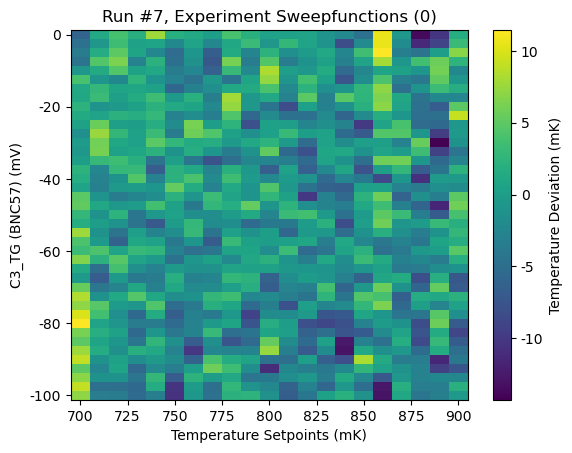

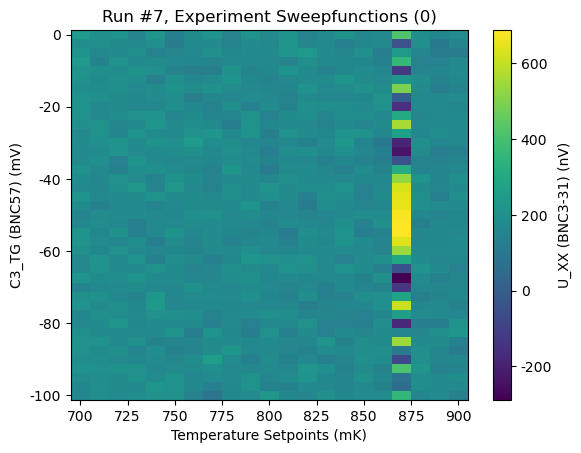

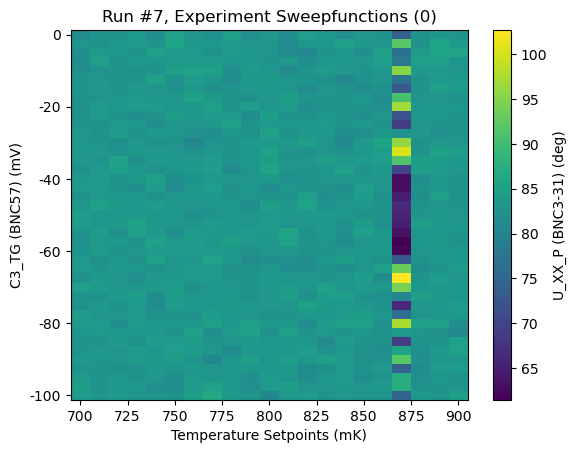

In [18]:
plot_by_id(7)

In [15]:
future_setpoint = 0.5
t_mc(future_setpoint)

2023-08-07 16:18:41,891 - Temperature Sweep                               - INFO - Turbo 1 has been switched on at T = 0.781212 K


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Triton9\miniconda3\envs\qcodes\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Triton9\AppData\Local\Temp\ipykernel_10600\3369576374.py", line 2, in <module>
    t_mc(future_setpoint)
  File "c:\Users\Triton9\miniconda3\envs\qcodes\lib\site-packages\qcodes\parameters\parameter_base.py", line 375, in __call__
    self.set(*args, **kwargs)
  File "c:\Users\Triton9\miniconda3\envs\qcodes\lib\site-packages\qcodes\parameters\parameter_base.py", line 623, in set_wrapper
    set_function(raw_val_step, **kwargs)
  File "c:\Users\Triton9\Documents\SweepTests\Sweepfunctions\Triton\sweepfunction.py", line 261, in set_raw
    self.wait_equilibration_time = wait_equilibration_time
  File "c:\Users\Triton9\Documents\SweepTests\Sweepfunctions\Triton\sweepfunction.py", line 442, in _move_to_setpoint
    sample_temp,
  File "c:\Users\Triton9\Documents\Sw

doNd-test

Starting experimental run with id: 8. Using 'qcodes.dataset.do1d'


An exception occured in measurement with guid: aaaaaaaa-0000-0000-0000-0189d057794d;
Traceback:
Traceback (most recent call last):
  File "c:\Users\Triton9\miniconda3\envs\qcodes\lib\site-packages\qcodes\dataset\dond\do_1d.py", line 159, in do1d
    param_set.set(set_point)
  File "c:\Users\Triton9\miniconda3\envs\qcodes\lib\site-packages\qcodes\parameters\parameter_base.py", line 623, in set_wrapper
    set_function(raw_val_step, **kwargs)
  File "c:\Users\Triton9\Documents\SweepTests\Sweepfunctions\Triton\sweepfunction.py", line 261, in set_raw
    self.wait_equilibration_time = wait_equilibration_time
  File "c:\Users\Triton9\Documents\SweepTests\Sweepfunctions\Triton\sweepfunction.py", line 431, in _move_to_setpoint
  File "c:\Users\Triton9\Documents\SweepTests\Sweepfunctions\Triton\sweepfunction.py", line 347, in live_configurator
    live_range = _get_best_heater_range(
KeyboardInterrupt

Measurement has been interrupted, data may be incomplete: 


(results #8@C:\Users\Triton9\Documents\SweepTests\Sweepfunctions\Triton\SweepfunctionsTest.db
 --------------------------------------------------------------------------------------------
 t_mc - numeric
 lockin_2_B1_XX_X - numeric,
 [<AxesSubplot: title={'center': 'Run #8, Experiment Sweepfunctions (0)'}, xlabel='T_mc (mK)', ylabel='U_XX (BNC3-31) (nV)'>],
 [None])

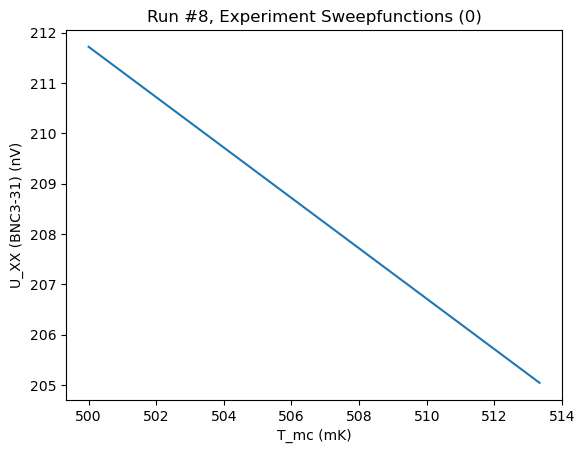

In [11]:
do1d(t_mc, 0.5, 0.7, 16, 0.1, lockin_2.B1_XX_X, do_plot=True)

In [31]:
sweepT = LogSweep(t_mc, -0.3, -0.15, 16, 0.1)
sweepTG = LinSweep(qdac.C3_TG, 0, -0.1, 41, 0.01)

In [36]:
sweepT.get_setpoints()[-1:] - sweepT.get_setpoints()[:-1]

array([0.20675855, 0.1950844 , 0.18313832, 0.17091399, 0.15840491,
       0.14560446, 0.13250585, 0.11910213, 0.1053862 , 0.09135078,
       0.07698844, 0.06229156, 0.04725234, 0.03186281, 0.01611481])

In [34]:
param_meas = [lockin_2.B1_XX_X, lockin_2.B1_XX_P, ls.ch08.temperature()]

Starting experimental run with id: 10. Using 'qcodes.dataset.dond'


(results #10@C:\Users\Triton9\Documents\SweepTests\Sweepfunctions\Triton\SweepfunctionsTest.db
 ---------------------------------------------------------------------------------------------
 t_mc - numeric
 lockin_2_B1_XX_X - numeric
 lockin_2_B1_XX_P - numeric,
 [<AxesSubplot: title={'center': 'Run #10, Experiment Sweepfunctions (0)'}, xlabel='T_mc (mK)', ylabel='U_XX (BNC3-31) (nV)'>,
  <AxesSubplot: title={'center': 'Run #10, Experiment Sweepfunctions (0)'}, xlabel='T_mc (mK)', ylabel='U_XX_P (BNC3-31) (deg)'>],
 [None, None])

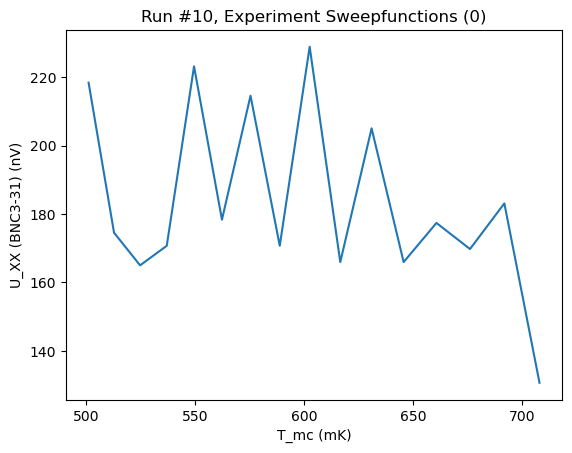

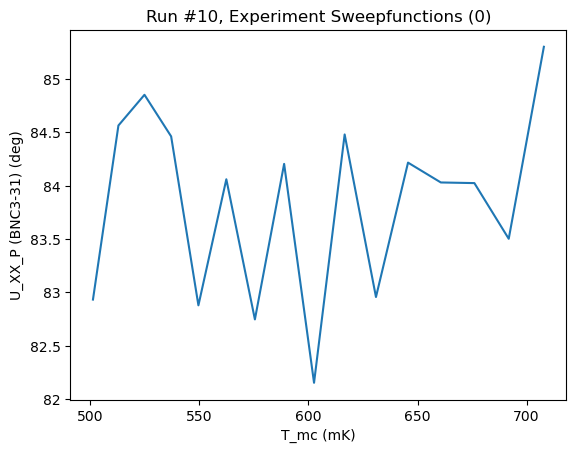

In [35]:
dond(sweepT, *param_meas, do_plot=True)

In [8]:
param_meas = [lockin_2.B1_XX_X, lockin_2.B1_XX_P, t_mc]

In [9]:
dond(sweepT, *param_meas, do_plot=True)

ValueError: Invalid dependencies

In [37]:
ls.sample_heater.setpoint(0)